In [1]:
%matplotlib notebook

In [2]:
# Dependencies
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [3]:
# Import our data into pandas from CSV
laborforce_stat = '../Resources/labor_force_stat.csv'
wage_data = '../Resources/wage_gap.csv'
union_stat = '../Resources/trade_union_density.csv'

wage_data_df = pd.read_csv(wage_data)
union_data_df= pd.read_csv(union_stat)
laborforce_df = pd.read_csv(laborforce_stat)

laborforce_df.head()

,Country,Age,Year,Unit,Labour force participation rate,Unemployment rate
0,Australia,15 to 64,2009,Percentage,76.385563,5.674757
1,Australia,15 to 64,2010,Percentage,76.435202,5.316399
2,Australia,15 to 64,2011,Percentage,76.642364,5.199671
3,Australia,15 to 64,2012,Percentage,76.430201,5.343534
4,Australia,15 to 64,2013,Percentage,76.405348,5.804560


In [4]:
laborforce_df.value_counts()

Country        Age       Year  Unit        Labour force participation rate  Unemployment rate
United States  15 to 64  2018  Percentage  73.626432                        3.937702             1
Greece         15 to 64  2016  Percentage  68.216542                        23.704153            1
Germany        15 to 64  2015  Percentage  77.632134                        4.720833             1
                         2016  Percentage  77.936526                        4.212946             1
                         2017  Percentage  78.244694                        3.829521             1
                                                                                                ..
New Zealand    15 to 64  2017  Percentage  80.892995                        4.940491             1
                         2018  Percentage  81.095210                        4.488641             1
Norway         15 to 64  2009  Percentage  78.896795                        3.150738             1
               

In [5]:

wage_data_df.head()

,Country,Measure,Year,Unit,Value
0,Australia,Low Pay Incidence,2009,Index,14.519909
1,Australia,Low Pay Incidence,2010,Index,15.980266
2,Australia,Low Pay Incidence,2011,Index,16.854955
3,Australia,Low Pay Incidence,2012,Index,17.588760
4,Australia,Low Pay Incidence,2013,Index,15.880548


In [6]:
wage_data_df.value_counts()

Country        Measure            Year  Unit   Value    
United States  Low Pay Incidence  2018  Index  24.065000    1
Denmark        Low Pay Incidence  2015  Index  8.236663     1
Finland        Low Pay Incidence  2017  Index  7.553086     1
                                  2016  Index  7.075868     1
                                  2015  Index  7.768176     1
                                                           ..
Latvia         Low Pay Incidence  2014  Index  26.037037    1
                                  2010  Index  26.571429    1
Korea          Low Pay Incidence  2018  Index  19.043569    1
                                  2017  Index  22.300000    1
Australia      Low Pay Incidence  2009  Index  14.519909    1
Length: 271, dtype: int64

In [7]:
union_data_df.head()

,Unnamed: 0,Country,Year,Union %,Gini,CPI
0,0,Hungary,2009,11.9,0.245,95.369304
1,1,Hungary,2015,9.0,0.291,111.384411
2,2,Poland,2009,16.3,0.305,97.484226
3,3,Poland,2010,18.3,0.307,100.000000
4,4,Poland,2011,17.0,0.304,104.239401


In [8]:
union_data_df.value_counts()

Unnamed: 0  Country          Year  Union %  Gini   CPI       
273         United States    2017  10.3     0.383  112.411595    1
93          Spain            2009  18.3     0.326  98.231933     1
87          Ireland          2016  25.6     0.311  104.722970    1
88          Ireland          2017  24.5     0.293  105.079627    1
89          Chile            2009  14.4     0.514  98.608902     1
                                                                ..
176         Slovak Republic  2010  15.2     0.261  100.000000    1
175         Slovak Republic  2009  16.0     0.266  99.052056     1
174         Estonia          2018  4.3      0.287  119.422704    1
173         Denmark          2017  66.1     0.265  108.633154    1
0           Hungary          2009  11.9     0.245  95.369304     1
Length: 274, dtype: int64

In [9]:
# filter only OECD nations as our population 
country_list=['United Kingdom', 'Spain', 'Austria', 'France', 'Germany', 'Ireland', 'Switzerland', 
              'Italy', 'Luxembourg', 'Greece', 'Israel','Netherlands', 'Belgium', 'Australia', 
              'New Zealand', 'Portugal', 'Turkey', 'Canada''Estonia', 'Czech Republic', 'Latvia', 'Lithuania',
              'Hungary', 'Slovak Republic', 'Slovenia''Norway','Finland' ,'Iceland', 'Sweden', 'Denmark','United States',
              'Korea', 'Japan','Mexico', 'Chile']

In [10]:
wage_df=wage_data_df[wage_data_df['Country'].isin(country_list)]
wage_df.head()

,Country,Measure,Year,Unit,Value
0,Australia,Low Pay Incidence,2009,Index,14.519909
1,Australia,Low Pay Incidence,2010,Index,15.980266
2,Australia,Low Pay Incidence,2011,Index,16.854955
3,Australia,Low Pay Incidence,2012,Index,17.588760
4,Australia,Low Pay Incidence,2013,Index,15.880548


In [11]:
clean_labor_df=laborforce_df[laborforce_df['Country'].isin(country_list)]
clean_labor_df.head()

,Country,Age,Year,Unit,Labour force participation rate,Unemployment rate
0,Australia,15 to 64,2009,Percentage,76.385563,5.674757
1,Australia,15 to 64,2010,Percentage,76.435202,5.316399
2,Australia,15 to 64,2011,Percentage,76.642364,5.199671
3,Australia,15 to 64,2012,Percentage,76.430201,5.343534
4,Australia,15 to 64,2013,Percentage,76.405348,5.804560


In [12]:
#merge union and labor data
combined_df1 = pd.merge(union_data_df, clean_labor_df, how="left", on="Country")
combined_df1.head()

,Unnamed: 0,Country,Year_x,Union %,Gini,CPI,Age,Year_y,Unit,Labour force participation rate,Unemployment rate
0,0,Hungary,2009,11.9,0.245,95.369304,15 to 64,2009.0,Percentage,61.225366,10.094073
1,0,Hungary,2009,11.9,0.245,95.369304,15 to 64,2010.0,Percentage,61.918052,11.252038
2,0,Hungary,2009,11.9,0.245,95.369304,15 to 64,2011.0,Percentage,62.365673,11.116679
3,0,Hungary,2009,11.9,0.245,95.369304,15 to 64,2012.0,Percentage,63.713364,11.073597
4,0,Hungary,2009,11.9,0.245,95.369304,15 to 64,2013.0,Percentage,64.697298,10.238820


In [13]:
#drop unwanted columns
clean_df= combined_df1.drop(columns=['Year_y','Unnamed: 0','Gini','CPI'])
clean_df.head()

,Country,Year_x,Union %,Age,Unit,Labour force participation rate,Unemployment rate
0,Hungary,2009,11.9,15 to 64,Percentage,61.225366,10.094073
1,Hungary,2009,11.9,15 to 64,Percentage,61.918052,11.252038
2,Hungary,2009,11.9,15 to 64,Percentage,62.365673,11.116679
3,Hungary,2009,11.9,15 to 64,Percentage,63.713364,11.073597
4,Hungary,2009,11.9,15 to 64,Percentage,64.697298,10.238820


In [14]:
len(clean_df["Country"].unique())

36

In [15]:
combined_df2 = pd.merge(clean_df, wage_df, how="left", on="Country")
combined_df2.head()

,Country,Year_x,Union %,Age,Unit_x,Labour force participation rate,Unemployment rate,Measure,Year,Unit_y,Value
0,Hungary,2009,11.9,15 to 64,Percentage,61.225366,10.094073,Low Pay Incidence,2009.0,Index,21.79
1,Hungary,2009,11.9,15 to 64,Percentage,61.225366,10.094073,Low Pay Incidence,2010.0,Index,21.00
2,Hungary,2009,11.9,15 to 64,Percentage,61.225366,10.094073,Low Pay Incidence,2011.0,Index,19.99
3,Hungary,2009,11.9,15 to 64,Percentage,61.225366,10.094073,Low Pay Incidence,2012.0,Index,17.39
4,Hungary,2009,11.9,15 to 64,Percentage,61.225366,10.094073,Low Pay Incidence,2013.0,Index,16.81


In [16]:
#Drop all rows with missing information
clean_df2 = combined_df2.dropna(how='any')
clean_df2.head()

,Country,Year_x,Union %,Age,Unit_x,Labour force participation rate,Unemployment rate,Measure,Year,Unit_y,Value
0,Hungary,2009,11.9,15 to 64,Percentage,61.225366,10.094073,Low Pay Incidence,2009.0,Index,21.79
1,Hungary,2009,11.9,15 to 64,Percentage,61.225366,10.094073,Low Pay Incidence,2010.0,Index,21.00
2,Hungary,2009,11.9,15 to 64,Percentage,61.225366,10.094073,Low Pay Incidence,2011.0,Index,19.99
3,Hungary,2009,11.9,15 to 64,Percentage,61.225366,10.094073,Low Pay Incidence,2012.0,Index,17.39
4,Hungary,2009,11.9,15 to 64,Percentage,61.225366,10.094073,Low Pay Incidence,2013.0,Index,16.81


In [17]:
#drop unwanted columns
total_df= clean_df2.drop(columns=['Year', 'Unit_x','Unit_y','Age','Measure'])
total_df.head()

,Country,Year_x,Union %,Labour force participation rate,Unemployment rate,Value
0,Hungary,2009,11.9,61.225366,10.094073,21.79
1,Hungary,2009,11.9,61.225366,10.094073,21.00
2,Hungary,2009,11.9,61.225366,10.094073,19.99
3,Hungary,2009,11.9,61.225366,10.094073,17.39
4,Hungary,2009,11.9,61.225366,10.094073,16.81


In [18]:
final_df= total_df.rename(columns = {'Year_x':'Year','Value':'Wage gap ratio'})
                                            
final_df.head()                                            

,Country,Year,Union %,Labour force participation rate,Unemployment rate,Wage gap ratio
0,Hungary,2009,11.9,61.225366,10.094073,21.79
1,Hungary,2009,11.9,61.225366,10.094073,21.00
2,Hungary,2009,11.9,61.225366,10.094073,19.99
3,Hungary,2009,11.9,61.225366,10.094073,17.39
4,Hungary,2009,11.9,61.225366,10.094073,16.81


In [19]:
final_df.describe()

,Year,Union %,Labour force participation rate,Unemployment rate,Wage gap ratio
count,14770.000000,14770.000000,14770.000000,14770.000000,14770.000000
mean,2013.142857,28.370752,73.712699,7.475536,16.067549
std,2.731695,22.286962,5.568421,3.925649,5.731985
min,2009.000000,6.300000,51.662142,2.284104,0.690932
25%,2011.000000,13.100000,70.097467,4.985612,11.479096
50%,2013.000000,18.400000,74.634421,6.607804,16.470113
75%,2015.000000,30.100000,77.177803,8.475518,20.000000
max,2018.000000,91.000000,89.049308,27.695363,27.285714


In [20]:
#creating a group of nations in OECD
west = ['United Kingdom', 'Spain', 'Austria', 'France', 'Germany', 'Ireland', 'Switzerland', 'Italy', 'Luxembourg', 'Greece', 'Israel',
                 'Netherlands', 'Belgium', 'Australia', 'New Zealand', 'Portugal', 'Turkey', 'Canada']
east =  ['Estonia', 'Czech Republic', 'Latvia', 'Lithuania', 'Hungary', 'Slovak Republic', 'Slovenia', 'Poland'] 
scandinavian = ['Norway', 'Finland' ,'Iceland', 'Sweden', 'Denmark']
us = ['United States']
asia = ['Korea', 'Japan']
latin = ['Mexico', 'Chile']

In [21]:

west_df = pd.DataFrame({"Country": west, "Dummy": ""})
east_df = pd.DataFrame({"Country": east})
scand_df = pd.DataFrame({"Country": scandinavian})
us_df = pd.DataFrame({"Country": us})
asia_df = pd.DataFrame({"Country": asia})
latin_df = pd.DataFrame({"Country": latin})

In [22]:
#merge filter dataframe with original
west_filter = pd.merge(final_df, west_df, on=["Country"])
east_filter = pd.merge(final_df, east_df, on=["Country"])
scand_filter = pd.merge(final_df, scand_df, on=["Country"])
us_filter = pd.merge(final_df, us_df, on=["Country"])
asia_filter = pd.merge(final_df, asia_df, on=["Country"])
latin_filter = pd.merge(final_df, latin_df, on=["Country"])
latin_filter.head()

,Country,Year,Union %,Labour force participation rate,Unemployment rate,Wage gap ratio
0,Mexico,2010,13.8,63.3086,5.563094,16.909523
1,Mexico,2010,13.8,63.3086,5.563094,19.122858
2,Mexico,2010,13.8,63.3086,5.563094,17.667996
3,Mexico,2010,13.8,63.3086,5.563094,15.993743
4,Mexico,2010,13.8,63.3086,5.563094,14.209133


In [23]:
#create empty column to iterate through rows to find each country and append it to the group of countires
final_df

final_df["Group"] = ""
final_df.head()

,Country,Year,Union %,Labour force participation rate,Unemployment rate,Wage gap ratio,Group
0,Hungary,2009,11.9,61.225366,10.094073,21.79,
1,Hungary,2009,11.9,61.225366,10.094073,21.00,
2,Hungary,2009,11.9,61.225366,10.094073,19.99,
3,Hungary,2009,11.9,61.225366,10.094073,17.39,
4,Hungary,2009,11.9,61.225366,10.094073,16.81,


In [24]:
for index, row in final_df.iterrows():
    if row["Country"] in west: 
        final_df.loc[index,"Group"] = "West"
       
    if row["Country"] in east: 
        final_df.loc[index,"Group"] = "East" 
        
    if row["Country"] in scandinavian: 
        final_df.loc[index,"Group"] = "Scandinavia"
       
    if row["Country"] in us: 
        final_df.loc[index,"Group"] = "US" 
      
    if row["Country"] in asia: 
        final_df.loc[index,"Group"] = "Asia" 
       
    if row["Country"] in latin: 
        final_df.loc[index,"Group"] = "Latin"
        
        
final_df.head()

,Country,Year,Union %,Labour force participation rate,Unemployment rate,Wage gap ratio,Group
0,Hungary,2009,11.9,61.225366,10.094073,21.79,East
1,Hungary,2009,11.9,61.225366,10.094073,21.00,East
2,Hungary,2009,11.9,61.225366,10.094073,19.99,East
3,Hungary,2009,11.9,61.225366,10.094073,17.39,East
4,Hungary,2009,11.9,61.225366,10.094073,16.81,East


In [25]:
final_data = final_df.dropna(how='any')
final_data.head()

,Country,Year,Union %,Labour force participation rate,Unemployment rate,Wage gap ratio,Group
0,Hungary,2009,11.9,61.225366,10.094073,21.79,East
1,Hungary,2009,11.9,61.225366,10.094073,21.00,East
2,Hungary,2009,11.9,61.225366,10.094073,19.99,East
3,Hungary,2009,11.9,61.225366,10.094073,17.39,East
4,Hungary,2009,11.9,61.225366,10.094073,16.81,East


<IPython.core.display.Javascript object>


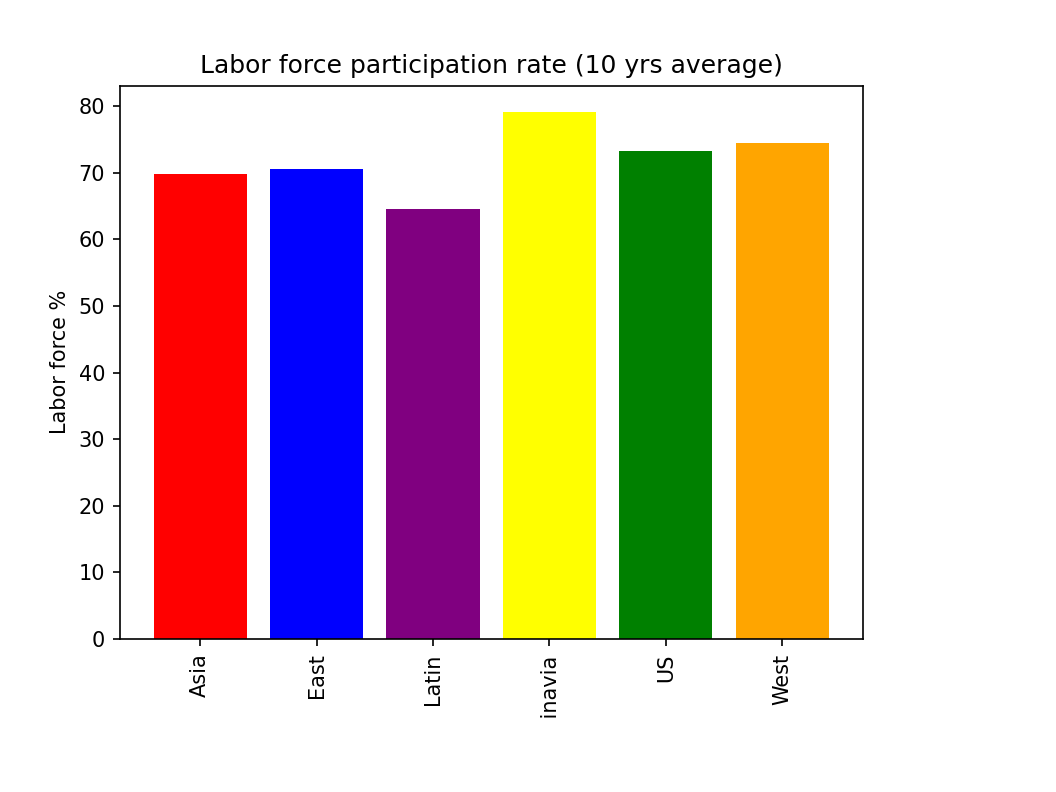

In [33]:
#Bar chart for average labor participation rate across region

fig1, ax1=plt.subplots()

x=np.arange(len(final_data['Group'].unique()))
y=final_data.groupby(['Group'])['Labour force participation rate'].mean()

plt.bar(x, y, color=['red', 'blue', 'purple', 'yellow','green', 'orange'])

tick_label=final_data['Group'].sort_values().unique()
plt.xticks(np.arange(0,6,1), tick_label, fontsize=10, rotation=90)
plt.title("Labor force participation rate (10 yrs average)")
plt.xlabel("Region (groups of OECD member countries)")
plt.ylabel("Labor force %")
plt.show()

plt.savefig("images/labor.png")


<IPython.core.display.Javascript object>


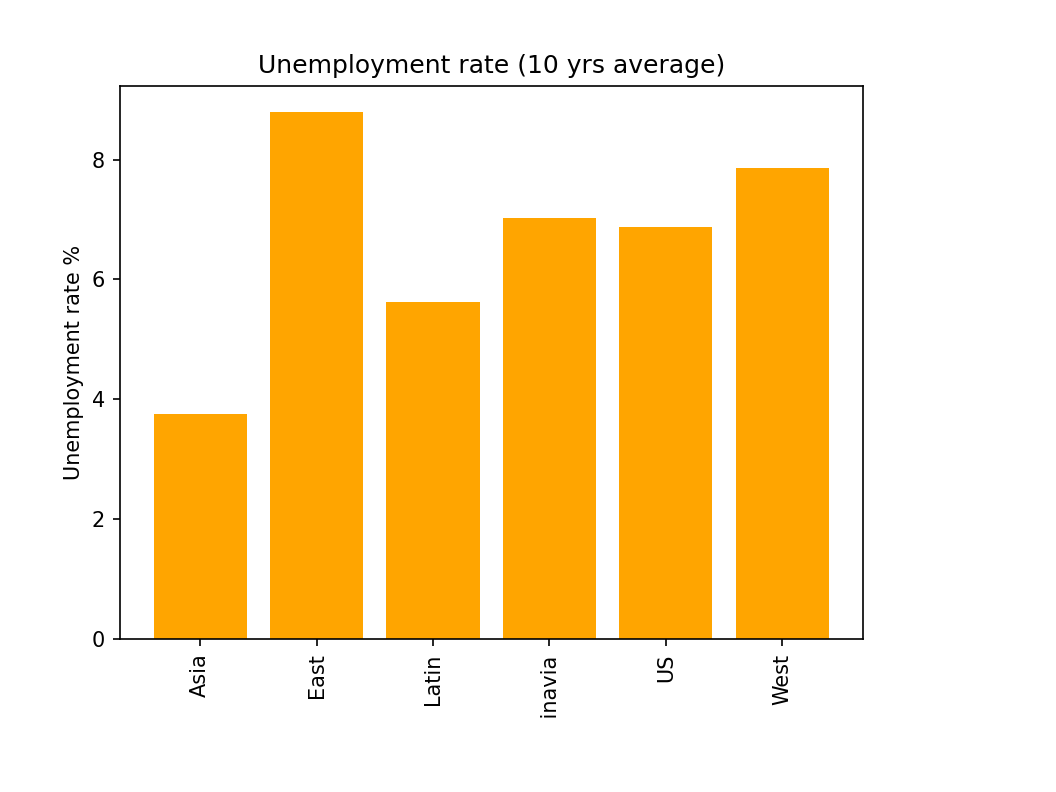

In [34]:
# Bar chart for average Unemployment rate across regions

fig1, ax1=plt.subplots()
x=np.arange(len(final_data['Group'].unique()))
y=final_data.groupby(['Group'])['Unemployment rate'].mean()

plt.bar(x, y, color=['orange'])

tick_label=final_data['Group'].sort_values().unique()
plt.xticks(np.arange(0,6,1), tick_label, fontsize=10, rotation=90)
plt.title("Unemployment rate (10 yrs average)")
plt.xlabel("Region (groups of OECD member countries)")
plt.ylabel("Unemployment rate %")
plt.show()
plt.savefig("images/unemployment.png")



In [37]:
final_df

final_df["Region"] = ""
final_df.head()

,Country,Year,Union %,Labour force participation rate,Unemployment rate,Wage gap ratio,Group,Region
0,Hungary,2009,11.9,61.225366,10.094073,21.79,East,
1,Hungary,2009,11.9,61.225366,10.094073,21.00,East,
2,Hungary,2009,11.9,61.225366,10.094073,19.99,East,
3,Hungary,2009,11.9,61.225366,10.094073,17.39,East,
4,Hungary,2009,11.9,61.225366,10.094073,16.81,East,


In [39]:
for index, row in final_data.iterrows():
    
    if row["Country"] in west: 
        final_data.loc[index,"Region"] = 10
        
    if row["Country"] in east: 
        final_data.loc[index,"Region"] = 50 
      
    if row["Country"] in scandinavian: 
        final_data.loc[index,"Region"] = 95
     
    if row["Country"] in us: 
        final_data.loc[index,"Region"] = 130 
     
    if row["Country"] in asia: 
        final_data.loc[index,"Region"] = 160
  
    if row["Country"] in latin: 
        final_data.loc[index,"Region"] = 190
     


In [46]:
#final_df.plot.scatter(x="Union %", y="Wage gap ratio", c="Region", figsize=(15,11), colormap="viridis"

<IPython.core.display.Javascript object>


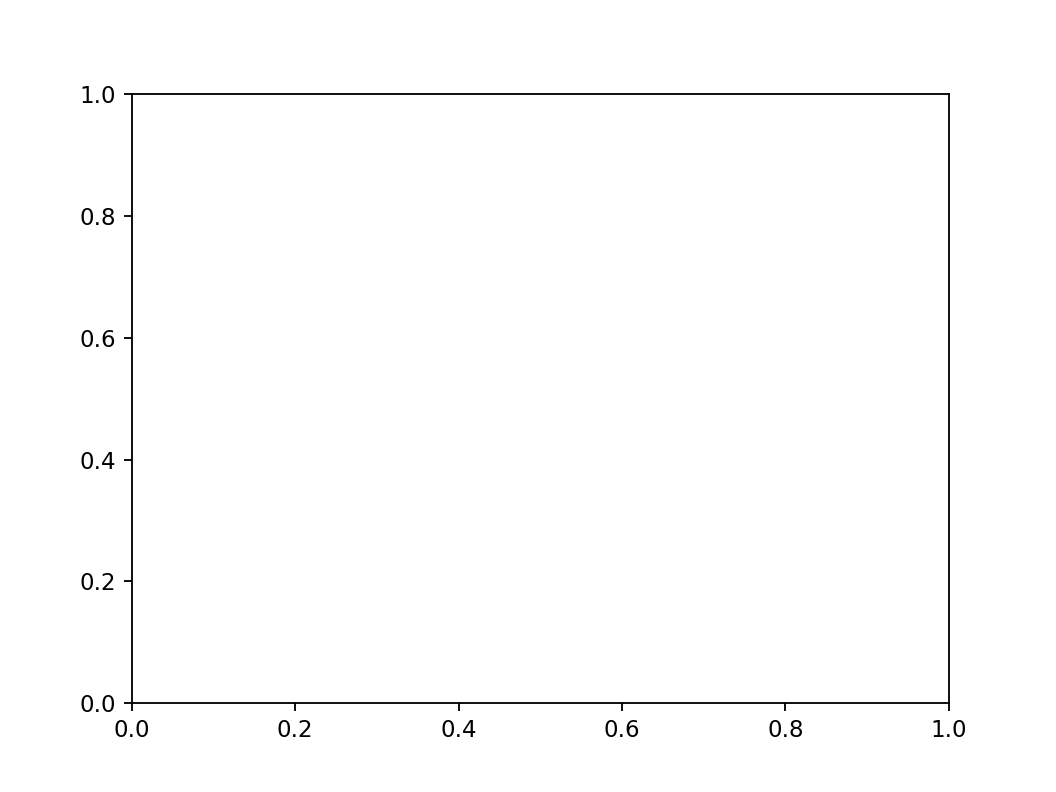

<IPython.core.display.Javascript object>


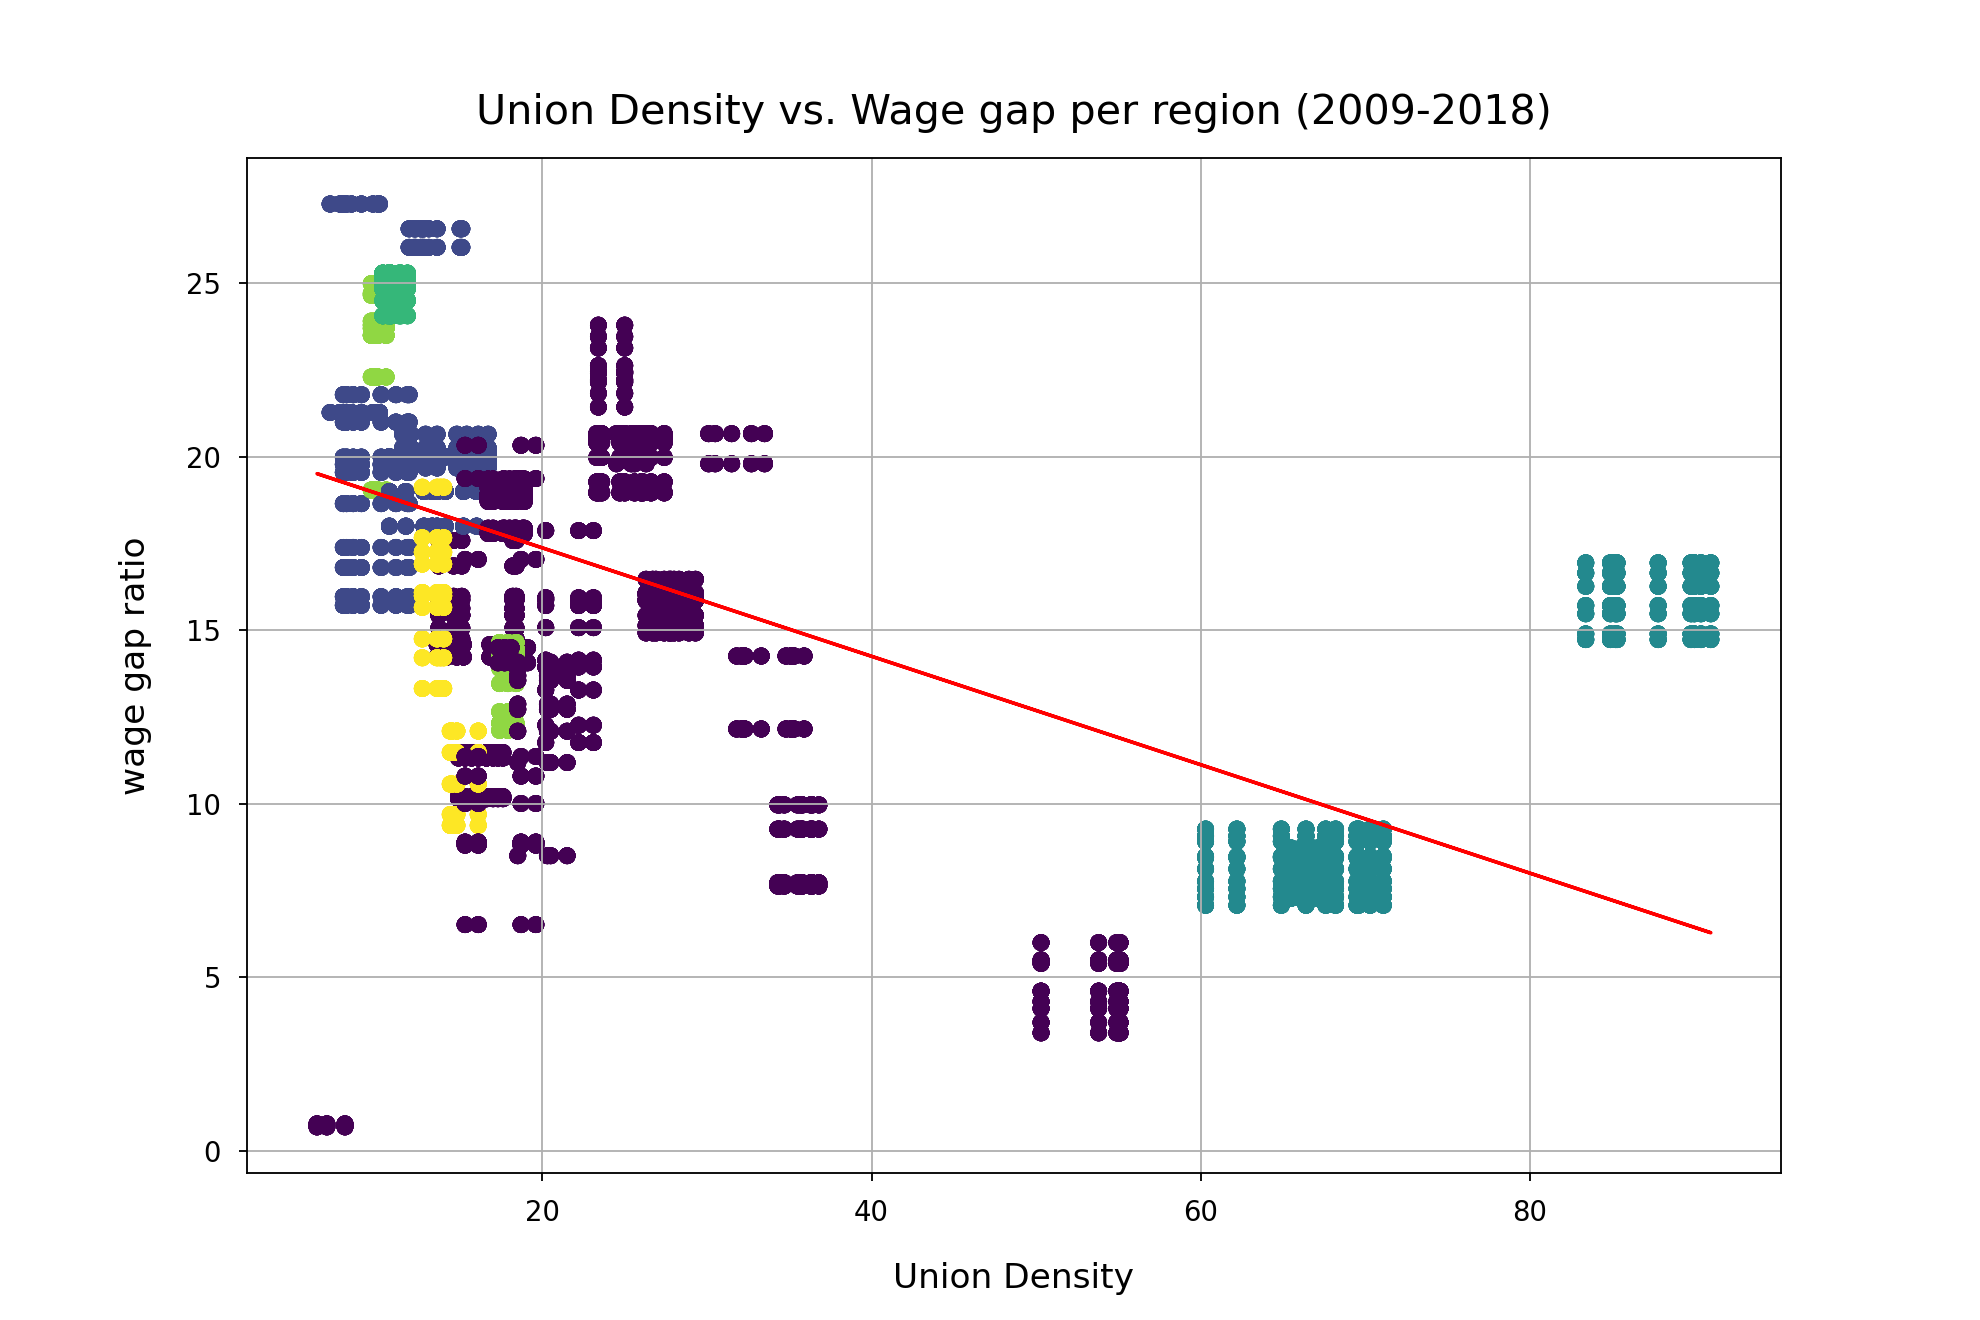

In [45]:
fig1, ax1=plt.subplots()

x_values=final_data['Union %']
y_values=final_data['Wage gap ratio']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values= x_values * slope + intercept
line_eq= "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(12,8))
plt.scatter(x_values, y_values, marker="o", c=final_data["Region"], s=40)

plt.plot(x_values, regress_values, "r-")
plt.annotate(f"rvalue: {round(rvalue,2)}", (70,100000), fontsize=16, color="darkblue")
plt.annotate(line_eq,(60,135), fontsize=20, color='red')
plt.title("Union Density vs. Wage gap per region (2009-2018)", fontsize=18, y=1.02)
plt.ylabel("wage gap ratio", fontsize=15, labelpad=15)
plt.xlabel("Union Density", fontsize=15, labelpad=15)
plt.tick_params(labelsize=12, pad=8)
plt.grid(True)
plt.show()

plt.savefig("images/wage gap.png")


In [44]:
print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.3688913847725118
